# Titanic EDA
[승선한 사람들의 생존 여부 예측](https://kaggle-kr.tistory.com/17?category=868316)

### [진행 순서]

1. 데이터셋 확인
2. EDA(탐색적 데이터 분석)
3. feature engineering
4. sklearn을 사용해 model 생성
5. 모델 학습 및 예측
6. 모델 평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

## 1. Dataset 확인

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ⭐ feature 정보

<table>
  <tr>
    <th style="background-color: darkblue">변수 (feature, variable)</th>
    <th style="background-color: darkblue">정의</th>
    <th style="background-color: darkblue">설명</th>
    <th style="background-color: darkblue">타입</th>
  </tr>
  <tr>
    <td>survived</td>
    <td>생존 여부</td>
    <td>target label로, 1 또는 0으로 표현됨</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>티켓의 클래스</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>sex</td>
    <td>성별</td>
    <td>male 또는 female로 구분되며 binary</td>
    <td>string</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>나이</td>
    <td>continuous</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>sibSp</td>
    <td>함께 탑승한 형제와 배우자의 수</td>
    <td>quantitative</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>parch</td>
    <td>함께 탑승한 부모, 아이의 수</td>
    <td>quantitative</td>
    <td>integer</td>
  </tr>
  <tr>
    <td>ticket</td>
    <td>티켓 번호</td>
    <td>alphabat + integer</td>
    <td>string</td>
  </tr>
  <tr>
    <td>fare</td>
    <td>탑승료</td>
    <td>continuous (부동 소수점)</td>
    <td>float</td>
  </tr>
  <tr>
    <td>cabin</td>
    <td>객실 번호</td>
    <td>alphabat + integer</td>
    <td>string</td>
  </tr>
  <tr>
    <td>embarked</td>
    <td>탑승 항구</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    <td>string</td>
  </tr>
</table>


In [4]:
# 기술통계값 확인
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- count 값을 확인했을 때, null data가 존재하는 열(feature)이 있는 것 같다. 
- 그래프로 시각화해서 살펴보자.

### 1.1 Null data 

__`column: {:>10}`__
- 열(column) 이름 col의 값을 10 문자 폭(width)의 필드에 넣겠다는 것을 의미
- 열 이름이 10문자보다 짧다면, 그 필드 내에서 우측 정렬

__`Percent of NaN value: {:.2f}%`__
- 해당 열(column)의 누락된(NaN) 값의 백분율
- `:.2f` 소수점 이하 두 자리까지 표시


In [8]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train set의 `Age`(19.87%), `Cabin`(77.10%), `Embarked`(0.22%)에서 Null data가 존재하는 것을 확인
- Test set의 `Age`(20.57%), `Cabin`(78.23%), `Fare`(0.24%)에서 Null data가 존재하는 것을 확인

<AxesSubplot:>

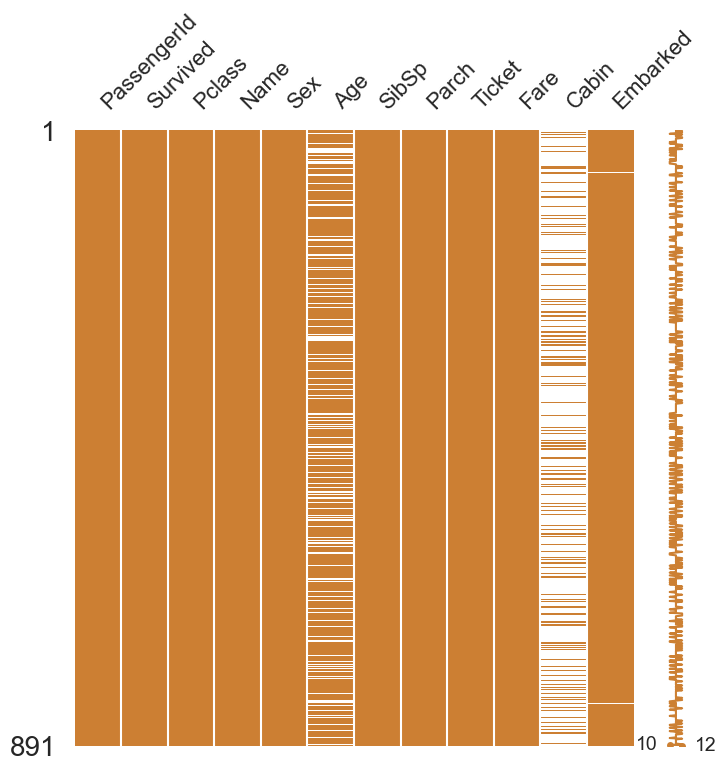

In [13]:
# msno 라이브러리를 사용해 결측값 간단히 확인

import missingno as msno
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

Text(0.5, 1.0, 'Test Data Missing Values')

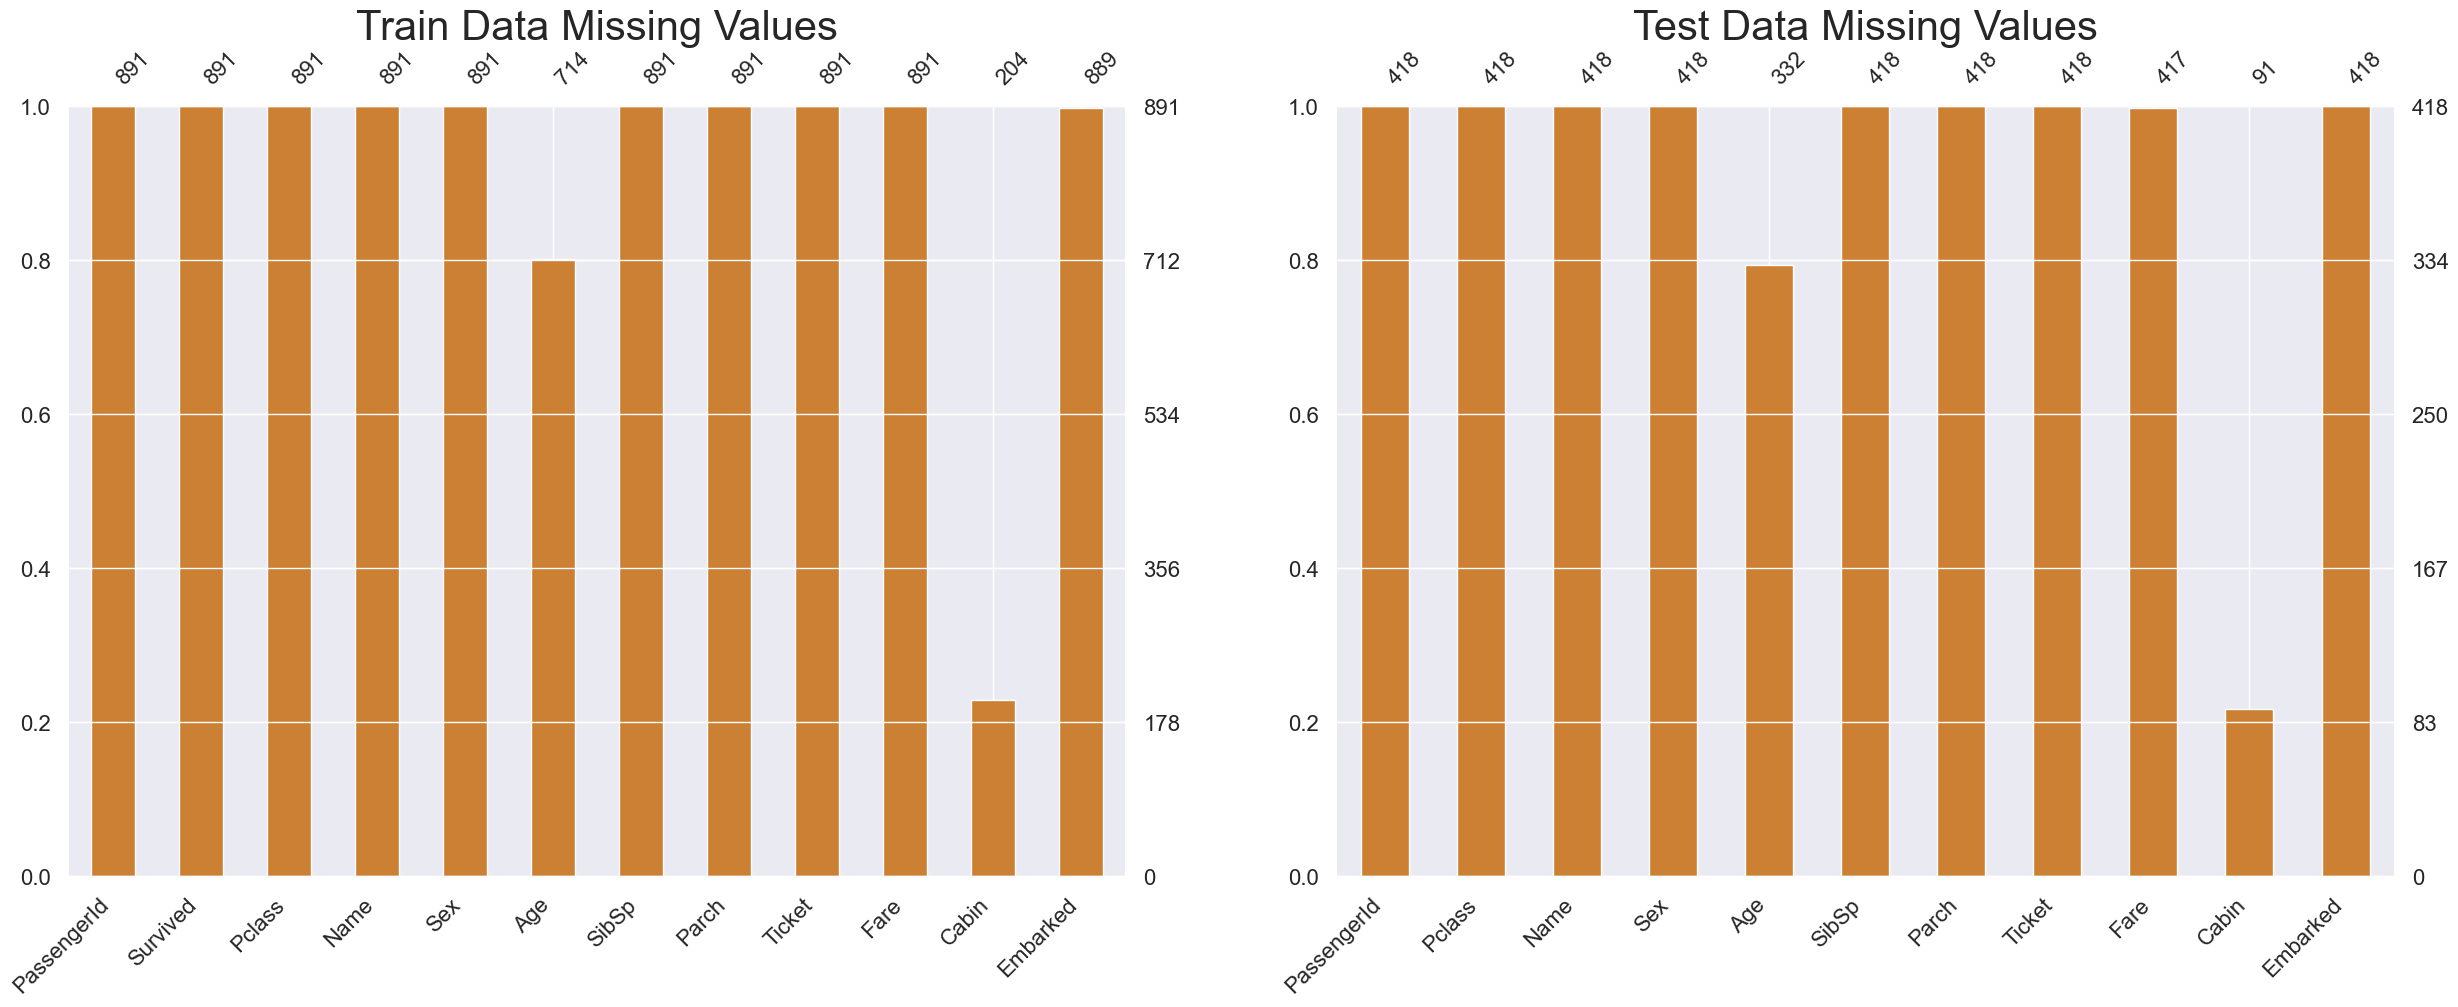

In [24]:
# subplot을 활용해 train과 test의 결측값 같이 보기

fig, axes = plt.subplots(1, 2, figsize = (30, 10))

msno.bar(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = axes[0])
axes[0].set_title('Train Data Missing Values')

msno.bar(df = df_test.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2), ax = axes[1])
axes[1].set_title('Test Data Missing Values')

### 1.2 Target label 확인

- target이 되는 label은 `생존 여부(survived)` ➡️ __binary classification__
- 1과 0이 어떤 distribution을 가지고 있는지에 따라 모델의 평가 방법이 달라질 수 있음


Text(0.5, 1.0, 'Count plot - Survived')

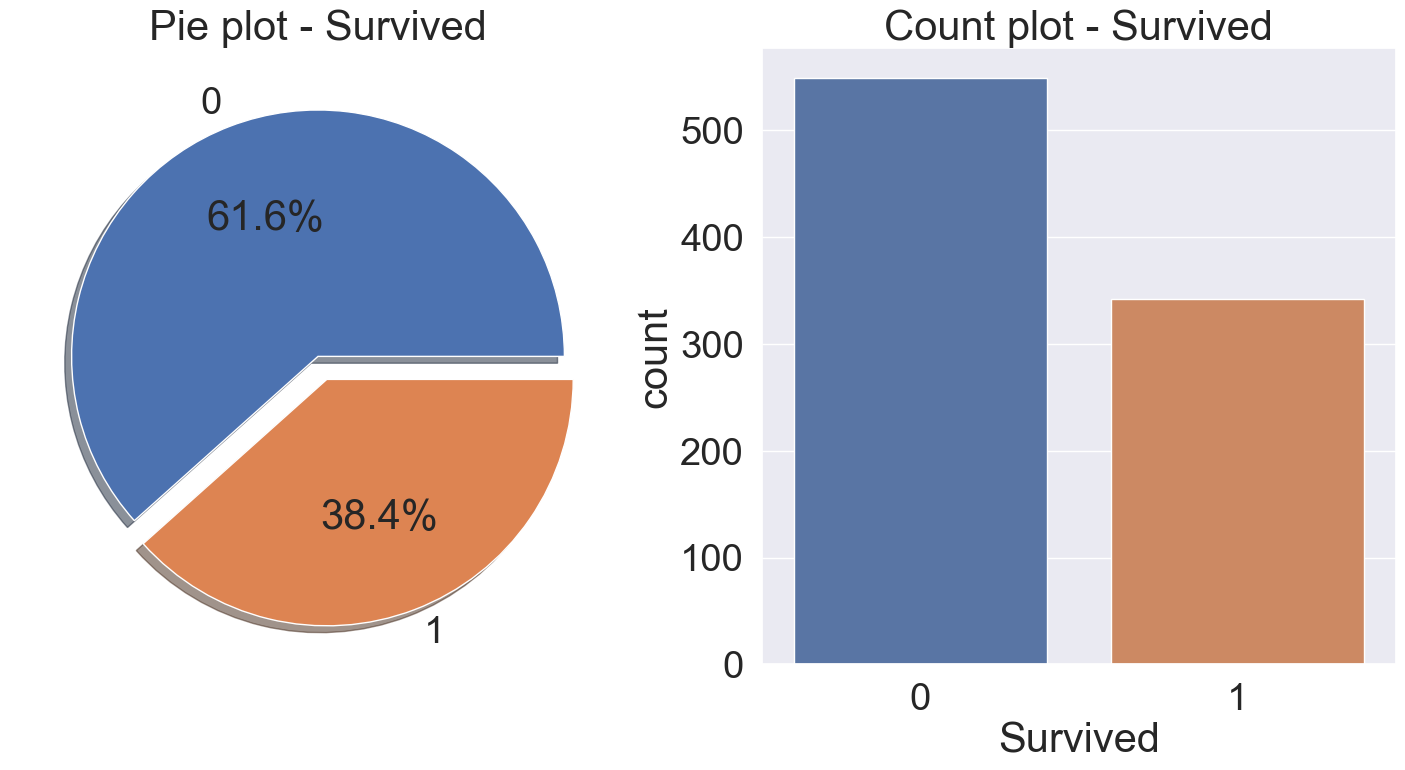

In [30]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(data = df_train, x = 'Survived', ax = ax[1])
ax[1].set_title('Count plot - Survived')